# MNIST Handwritten Digits Recognition NN from scratch

Today, we'll implement a simple two-layer neural network and train it on the MNIST digit recognizer dataset.


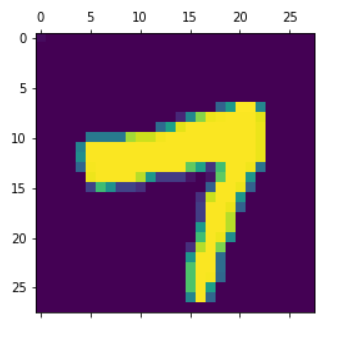

### Description
Here, we have an example `28 x 28` image (total `784` pixels) as our input. The goal of this neural network is to correctly predict which number this is.

Let's begin by importing necessary libraries (we'll only use `numpy`, `pandas`, and `matplotlib`). Also, lets read our csv data `train.csv`.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

In [2]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data preprocessing
Here, we are preprocessing our `train.csv` data and producing `X_train`, `Y_train`, `X_train`, `Y_train`.

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into training and test sets

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

### Plotting a sample

Let's plot a sample data.  
**Note:** Try changing the index value to get other samples

The image value is 4


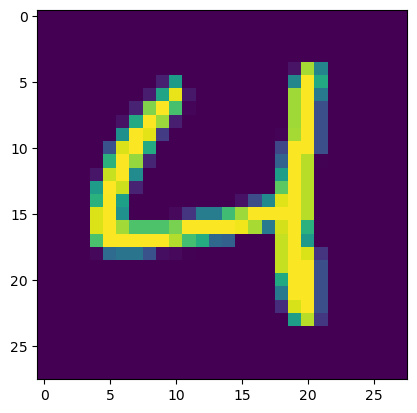

In [4]:
index = 1200
plt.imshow(data[index][1:len(data[index])].reshape(28,28))
print(f"The image value is {data[index][0]}")

### Our Neural Network Arhitecture
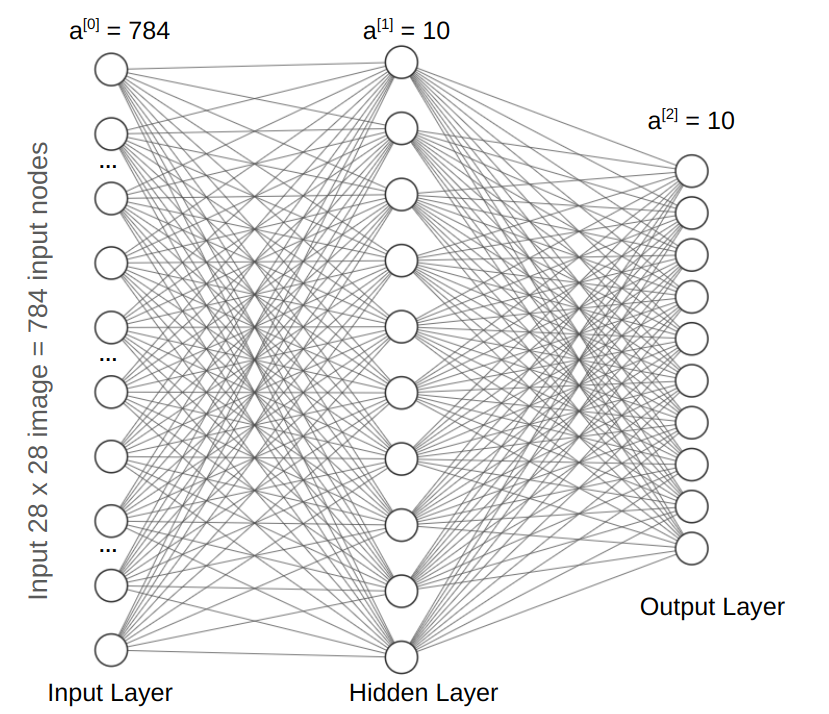

The neural network we are building will consist of two layers. The input layer, denoted as $a^{[0]}$, will comprise 784 units, corresponding to the 784 pixels present in each `28x28` input image. The hidden layer, represented by $a^{[1]}$, will have 10 units that will have `ReLU` activation, and lastly, the output layer, denoted as $a^{[2]}$, will consist of 10 units, each of which corresponds to one of the ten digit classes, with `softmax` activation.

In the meantime, we initiaize the initial parameters $W^{[1]}$ , $B^{[1]}$, $W^{[2]}$, $B^{[2]}$. We'll also write the `ReLU` and `softmax` activation functions.

#### Shapes of $W^{[1]}$ , $B^{[1]}$, $W^{[2]}$, $B^{[2]}$ are given below:
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $W^{[2]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10,1) -0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0,Z)

def softmax(Z):
    A = np.exp(Z)/np.sum(np.exp(Z), axis=0)
    return A

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Forward Prop vars and shapes**

- $A^{[0]} = X$: 784 x `m` training examples
- $Z^{[1]} \sim A^{[1]}$: 10 x `m` training examples
- $Z^{[2]} \sim A^{[2]}$: 10 x `m` training examples



In [6]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Back Prop vars and shapes**

- $dZ^{[2]}$: 10 x `m` training examples ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x `m` training examples ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1

In [7]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1 / X.shape[1]) * np.dot(dZ2, A1.T)
    db2 = (1 / X.shape[1]) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * ReLU_deriv(Z1)
    dW1 = (1 / X.shape[1]) * np.dot(dZ1, X.T)
    db1 = (1 / X.shape[1]) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$


In [8]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1  
    W2 = W2 - alpha * dW2 
    b2 = b2 - alpha * db2 
    return W1, b1, W2, b2

In [9]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        # Call forward_prop, backward_prop and update_params functions accordingly
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [10]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[3 8 3 ... 4 4 3] [1 1 1 ... 9 6 1]
0.16202439024390244
Iteration:  10
[3 8 1 ... 4 4 2] [1 1 1 ... 9 6 1]
0.2224390243902439
Iteration:  20
[3 1 1 ... 4 4 2] [1 1 1 ... 9 6 1]
0.28485365853658534
Iteration:  30
[3 1 1 ... 4 4 2] [1 1 1 ... 9 6 1]
0.3365609756097561
Iteration:  40
[3 1 1 ... 9 4 2] [1 1 1 ... 9 6 1]
0.38390243902439025
Iteration:  50
[1 1 1 ... 9 4 1] [1 1 1 ... 9 6 1]
0.4362439024390244
Iteration:  60
[1 1 1 ... 4 4 1] [1 1 1 ... 9 6 1]
0.4801219512195122
Iteration:  70
[1 1 1 ... 4 4 1] [1 1 1 ... 9 6 1]
0.5163658536585366
Iteration:  80
[1 1 1 ... 4 4 1] [1 1 1 ... 9 6 1]
0.545609756097561
Iteration:  90
[1 1 1 ... 4 4 1] [1 1 1 ... 9 6 1]
0.5726829268292682
Iteration:  100
[1 1 1 ... 4 4 1] [1 1 1 ... 9 6 1]
0.5946829268292683
Iteration:  110
[1 1 1 ... 4 4 1] [1 1 1 ... 9 6 1]
0.6138292682926829
Iteration:  120
[1 1 1 ... 4 4 1] [1 1 1 ... 9 6 1]
0.6336585365853659
Iteration:  130
[1 1 1 ... 4 4 1] [1 1 1 ... 9 6 1]
0.6512682926829269
Iteration:  140

Around 83-85% accuracy is expected on training set. You can even aim for more!

In [11]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at a couple of examples:

Prediction:  [1]
Label:  1


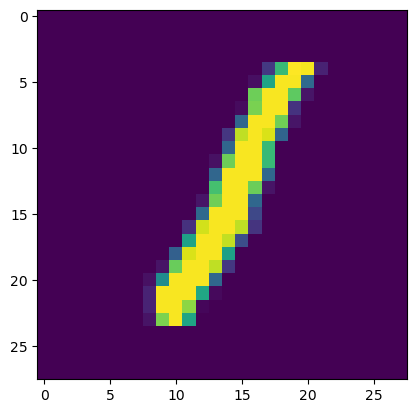

Prediction:  [1]
Label:  1


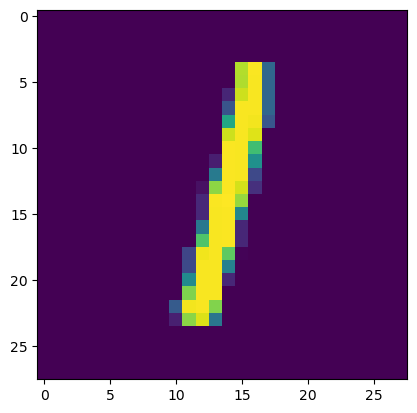

Prediction:  [1]
Label:  1


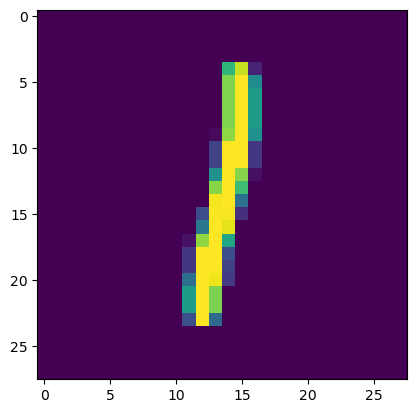

Prediction:  [1]
Label:  1


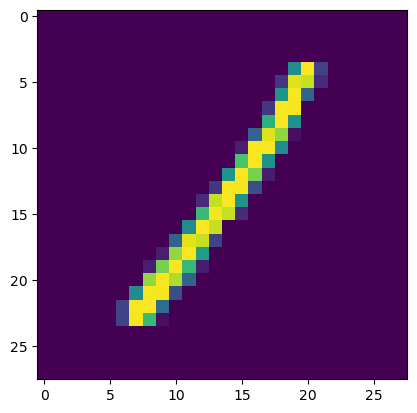

In [12]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Finally, let's find the accuracy on the test set:

In [13]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[7 1 8 1 2 9 8 7 2 1 7 3 5 1 7 0 3 7 5 3 9 3 1 1 8 3 4 1 3 0 4 1 6 7 3 9 2
 1 0 0 6 4 0 5 8 7 4 1 7 8 7 3 9 7 3 9 7 8 2 6 1 2 8 9 5 1 9 0 0 9 2 4 9 5
 4 3 1 9 1 1 8 3 2 2 8 1 7 9 5 0 0 0 6 2 0 2 6 2 1 6 7 2 6 5 9 8 1 1 6 3 2
 0 6 0 0 4 3 8 5 2 0 7 3 7 8 0 8 4 6 9 2 9 1 7 8 0 6 9 2 9 8 1 7 6 7 8 3 9
 5 5 5 2 1 9 6 4 8 9 7 9 6 7 0 3 5 8 8 0 0 0 6 5 7 9 6 9 0 9 8 6 4 1 6 8 5
 6 2 2 2 2 4 8 4 9 6 8 0 1 2 9 2 0 3 8 9 0 8 5 4 5 0 2 4 6 7 6 7 4 1 3 8 7
 6 5 3 7 9 6 1 1 2 2 4 8 0 7 4 7 3 3 5 6 6 7 7 5 6 3 3 2 1 7 2 6 1 3 4 8 5
 1 4 3 1 9 0 2 9 6 6 3 7 3 2 6 1 0 2 3 8 3 6 7 6 6 0 9 1 7 2 6 2 4 3 2 6 8
 6 9 1 7 3 8 1 9 3 5 5 5 5 9 1 6 7 2 6 9 2 0 7 1 0 5 6 1 4 7 5 4 5 6 7 9 7
 9 3 3 1 2 1 2 0 3 3 2 7 6 7 1 0 1 4 8 2 0 8 1 9 0 5 1 0 6 0 2 7 7 8 8 3 9
 6 1 9 6 8 9 9 4 6 7 1 5 2 5 4 6 6 8 4 5 9 4 9 3 4 6 3 7 1 9 9 1 1 3 0 7 4
 7 6 4 3 1 7 4 1 0 1 9 7 9 0 7 9 3 2 2 5 2 8 0 0 8 1 1 4 4 6 0 5 2 9 3 8 8
 2 2 3 2 9 0 3 7 6 8 2 5 9 4 1 8 9 3 1 7 4 2 8 1 8 6 5 2 3 0 6 7 7 7 2 3 9
 6 2 8 8 4 4 7 7 5 3 9 8 

0.836

Around 84-87% accuracy is reasonable. But you can aim for more!